<a href="https://colab.research.google.com/github/miguelcastu/p2/blob/master/practica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GRUPO 23
Practica 2

Álvaro Ávila Mangas

Rafael Vicente Constasti

# Lectura de datos

In [25]:
import  pickle

#Se lee el fichero
f=open('attrition_available_23.pkl','rb')
datos = pickle.load(f)


# EDA

Importamos las librerias necesarias

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<h1>EDA OPCIONAL (no en el enunciado)</h1>

Antes de proceder al EDA realizaremos algunas tecnicas de EDA no mencionadas en el enunciado, de cara al preproceso de los datos



> Calculo de valores atipicos



Columnas a estudiar:
*   Age
*   MonthlyIncome
*   DistanceFromHome
*   Education
*   JobLevel
*   TotalWorkingYears
*   YearsAtCompany
*   YearsWithCurrManager

Hemos elegido estas columnas porque son algunas de las variables que podrían tener un impacto importante en la retención de los empleados en una empresa.

Por ejemplo, la edad de los empleados podría estar relacionada con su intención de permanecer en la empresa a largo plazo, ya que los empleados mayores pueden tener menos probabilidades de buscar nuevas oportunidades de trabajo. El salario mensual, la satisfacción laboral y el equilibrio entre trabajo y vida personal también podrían ser factores importantes en la retención de empleados, ya que los empleados que se sienten bien compensados y satisfechos con su trabajo podrían estar menos inclinados a buscar oportunidades laborales en otros lugares.

Las variables relacionadas con la educación y el nivel de experiencia laboral también podrían tener un impacto importante en la retención de empleados, ya que los empleados que han invertido tiempo y recursos en su educación y formación podrían estar más comprometidos con su carrera y menos dispuestos a dejar su trabajo actual.

En general, la elección de las variables depende del contexto específico y de los objetivos del análisis. Es importante tener en cuenta que otras variables también podrían ser importantes para tu análisis en función del contexto específico de la empresa y de los empleados.

<ipython-input-50-6a47a7db0d5b>:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  valores_atipicos = ((datos < lim_inf) | (datos > lim_sup)).any(axis=1)


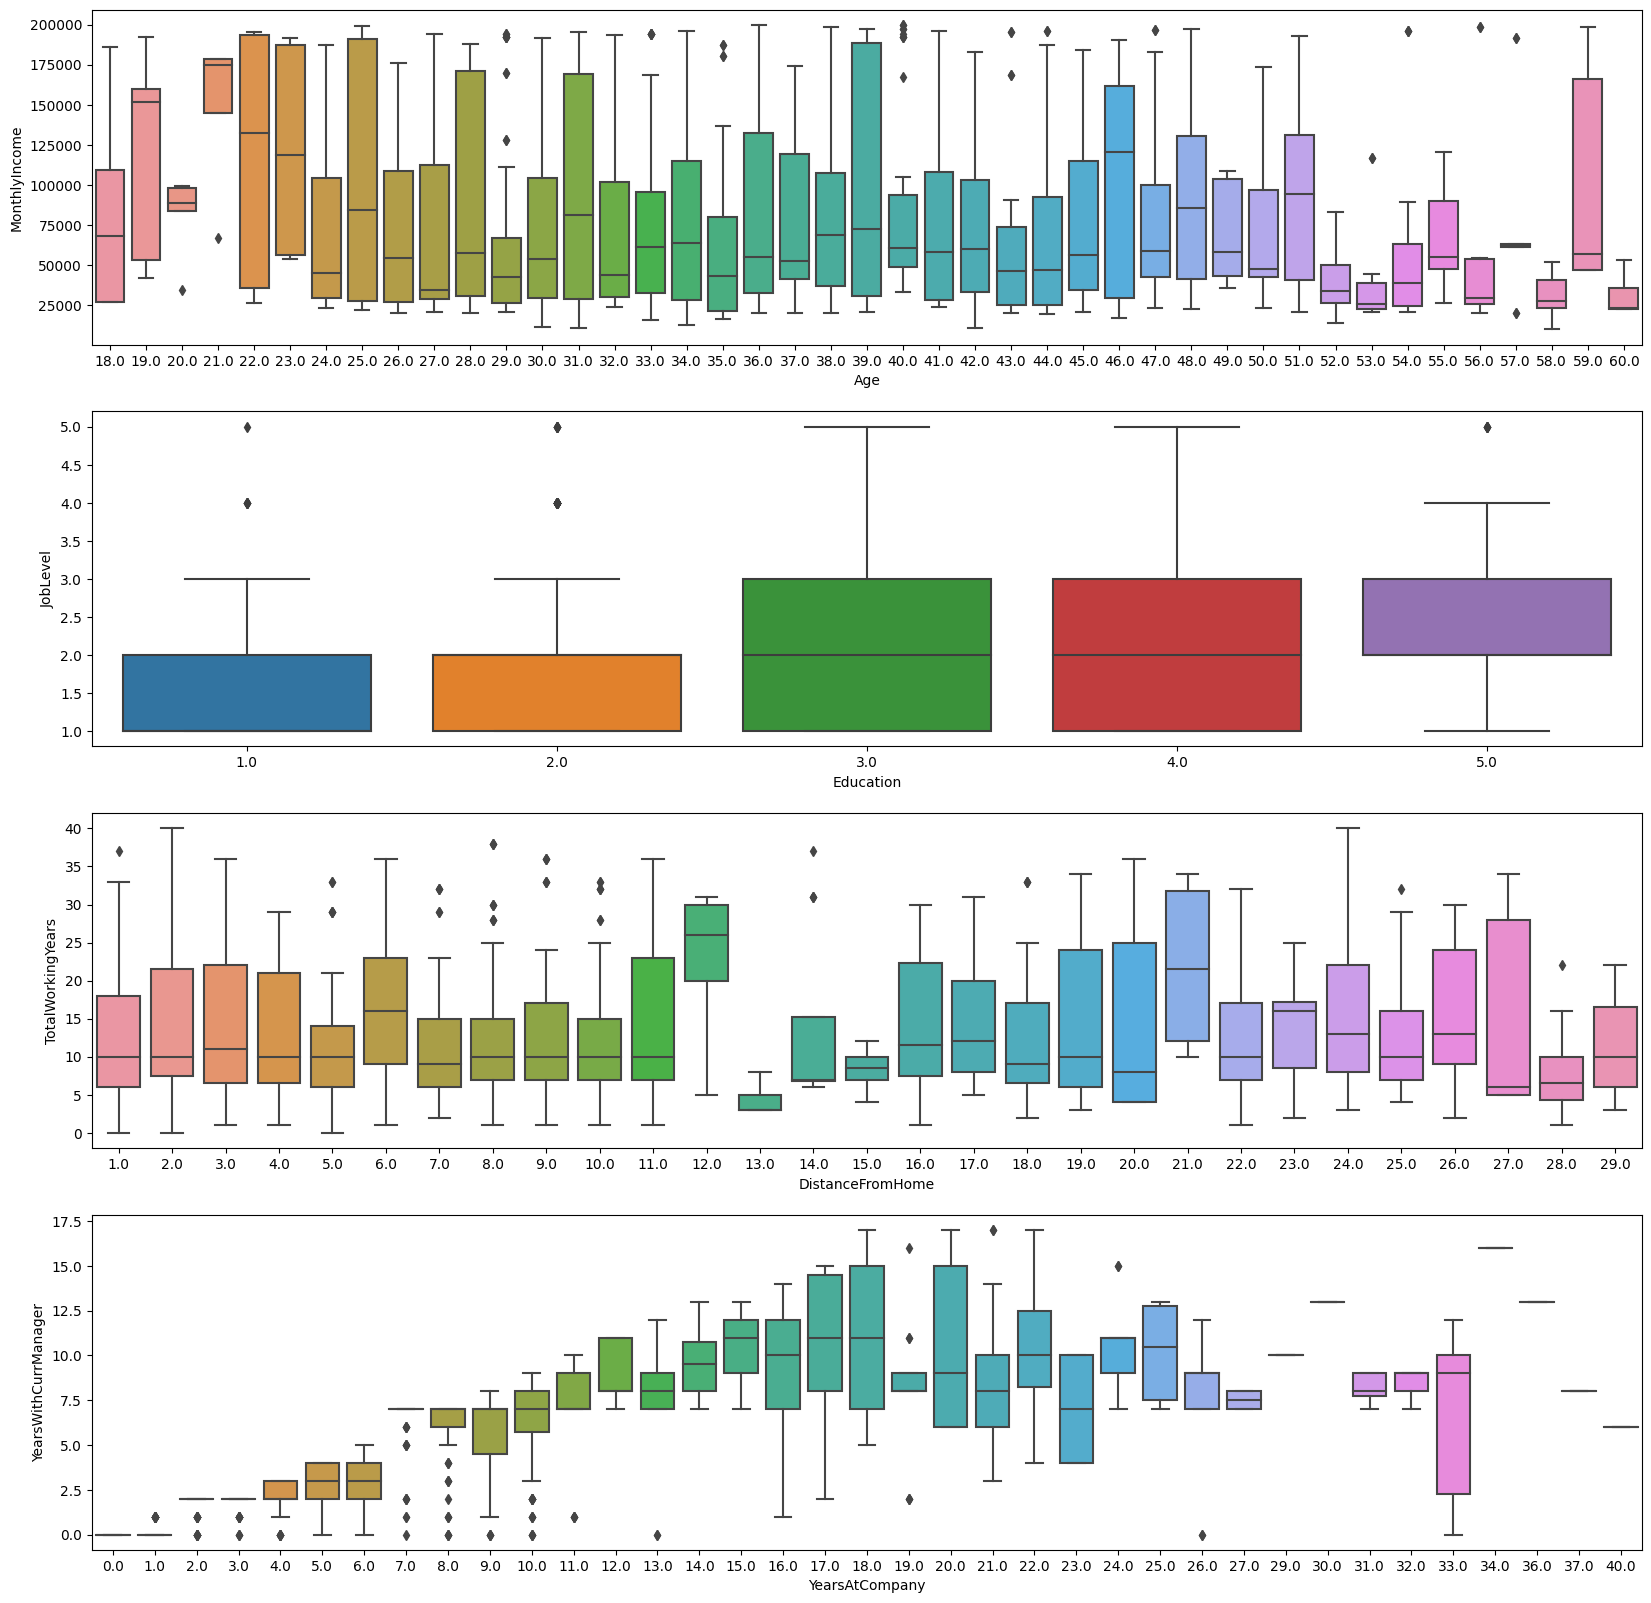

In [50]:
descripcion = datos.describe()

# Calculo del rango intercuartílico (IQR)
q1 = descripcion.loc['25%']
q3 = descripcion.loc['75%']
iqr = q3 - q1

# Límites inferior y superior para detectar valores atípicos
lim_inf = q1 - 1.5 * iqr
lim_sup = q3 + 1.5 * iqr

# Filtro de los valores atípicos para cada columna
valores_atipicos = ((datos < lim_inf) | (datos > lim_sup)).any(axis=1)

# Para organizar los boxplot
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(20, 20))

# Boxplot
sns.boxplot(x='Age', y='MonthlyIncome', data=datos[valores_atipicos],  ax=axes[0])
sns.boxplot(x='Education', y='JobLevel', data=datos[valores_atipicos], ax=axes[1])
sns.boxplot(x='DistanceFromHome', y='TotalWorkingYears', data=datos[valores_atipicos],  ax=axes[2])
sns.boxplot(x='YearsAtCompany', y='YearsWithCurrManager', data=datos[valores_atipicos], ax=axes[3])

plt.show()


Como hemos podido observar hay bastantes valores atipicos.

<h1>EDA (del enunciado)</h1>


> Obtener el número de instancias y atributos

In [51]:
n_instancias = datos.shape[0]
n_atributos = datos.shape[1]

print(f"El conjunto de datos tiene {n_instancias} instancias y {n_atributos} atributos")


El conjunto de datos tiene 4410 instancias y 31 atributos



> Tipo de atributos



In [52]:
tipos_atributos = datos.dtypes

print("Los tipos de los atributos son:\n")
print(tipos_atributos)

Los tipos de los atributos son:

hrs                        float64
absences                   float64
JobInvolvement             float64
PerformanceRating          float64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
Age                        float64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome           float64
Education                  float64
EducationField              object
EmployeeCount              float64
EmployeeID                 float64
Gender                      object
JobLevel                   float64
JobRole                     object
MaritalStatus               object
MonthlyIncome              float64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike          float64
StandardHours              float64
StockOptionLevel           float64
TotalWorkingYears          float64
TrainingTimesLastYear 


> Columnas constantes o innecesarias



In [53]:
# Columnas constantes serian las que tienen el mismo valor o tienen un valor y NaN
columnas_constantes = [col for col in datos.columns if datos[col].nunique() == 1]

# Columnas innecesarias
columnas_innecesarias = [col for col in datos.columns if datos[col].isnull().sum() > 0.2*n_instancias]

print("Las columnas constantes son:\n")
print(columnas_constantes)

#Valores faltantes = NaN
print("\nLas columnas con más del 20% de valores faltantes son:\n")
print(columnas_innecesarias)

Las columnas constantes son:

['EmployeeCount', 'Over18', 'StandardHours']

Las columnas con más del 20% de valores faltantes son:

['hrs', 'absences', 'JobInvolvement', 'Age', 'DistanceFromHome', 'EmployeeID', 'StockOptionLevel', 'TotalWorkingYears', 'YearsSinceLastPromotion']



> Proporción de missing values por atributo



In [54]:
prop_missing = datos.isnull().sum() / n_instancias

print("La proporción de valores faltantes por atributo es: \n")
print(prop_missing)

La proporción de valores faltantes por atributo es: 

hrs                        0.214286
absences                   0.208390
JobInvolvement             0.203401
PerformanceRating          0.173696
EnvironmentSatisfaction    0.173243
JobSatisfaction            0.185034
WorkLifeBalance            0.008617
Age                        0.218594
Attrition                  0.000000
BusinessTravel             0.000000
Department                 0.160998
DistanceFromHome           0.210658
Education                  0.161678
EducationField             0.198639
EmployeeCount              0.196825
EmployeeID                 0.216780
Gender                     0.168934
JobLevel                   0.174830
JobRole                    0.182993
MaritalStatus              0.000000
MonthlyIncome              0.196825
NumCompaniesWorked         0.170748
Over18                     0.161678
PercentSalaryHike          0.170748
StandardHours              0.192517
StockOptionLevel           0.218141
TotalWorki


> El problema es de clasificacion (columna Attrition)





> ¿Es desbalanceado?




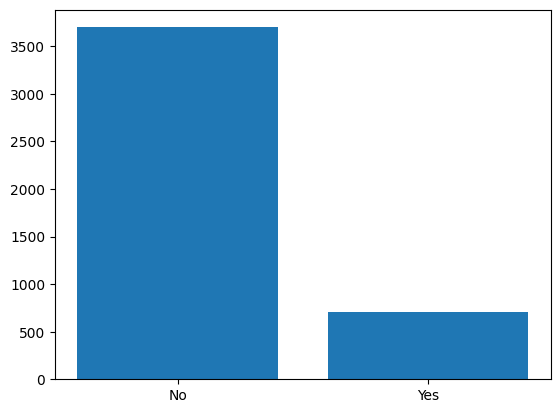

La proporcion de instancias en la columna 'Attrition' que es 'Yes' es: 0.8387755102040816
La proporcion de instancias en la columna 'Attrition' que es 'No' es: 0.16122448979591836


In [55]:
# Numero de instancias Yes y No
counts = datos['Attrition'].value_counts()

# Para que sea mas visual
num_instancias_yes = counts[0]
num_instancias_no = counts[1]

# Visualizar el desbalanceo
plt.bar(counts.index, counts.values)
plt.show()

# Proporcion de Yes y No
target_prop_yes = num_instancias_yes / n_instancias
target_prop_no = num_instancias_no / n_instancias

print(f"La proporcion de instancias en la columna 'Attrition' que es 'Yes' es: {target_prop_yes}")
print(f"La proporcion de instancias en la columna 'Attrition' que es 'No' es: {target_prop_no}")

Por lo que confirmamos que es desbalanceado

# Evaluacion del conjuto de datos

Division de los datos

X->Datos quitando columna solucion

y->Columna solucion



In [56]:
X = datos.drop('Attrition', axis=1)
y = datos['Attrition']

Train->Entrenar y ajustar hiperparametros

Test->Evaluar distintas posibilidades


> Primero hacemos una division no estratificada para comparar (aunque nos quedaremos con el estratificada esto es solo para comparar)




In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Comprobemos ahora la distribución de las clases.
n_pos_pct = num_instancias_yes / (num_instancias_yes + num_instancias_no)

instancias_positivas_train = (y_train == "Yes").sum()
instancias_positivas_test = (y_test == "Yes").sum()

n_pos_train_pct = instancias_positivas_train / len(y_train)
n_pos_test_pct = instancias_positivas_test / len(y_test)

print(f"Hay un {100 * n_pos_train_pct:.1f} % de instancias positivas en train.")
print(f"Hay un {100 * n_pos_test_pct:.1f} % de instancias positivas en test.")
print(f"Hay un {100 * n_pos_pct:.1f} % de instancias positivas en total.\n")





Hay un 15.8 % de instancias positivas en train.
Hay un 17.3 % de instancias positivas en test.
Hay un 83.9 % de instancias positivas en total.





> Ahora realizaremos una división estratificada y con random_state=42, para que sea reproducible




In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=42)

# Comprobemos ahora la distribución de las clases.
n_pos_pct = num_instancias_yes / (num_instancias_yes + num_instancias_no)

instancias_positivas_train = (y_train == "Yes").sum()
instancias_positivas_test = (y_test == "Yes").sum()

n_pos_train_pct = instancias_positivas_train / len(y_train)
n_pos_test_pct = instancias_positivas_test / len(y_test)

print(f"Hay un {100 * n_pos_train_pct:.1f} % de instancias positivas en train.")
print(f"Hay un {100 * n_pos_test_pct:.1f} % de instancias positivas en test.")
print(f"Hay un {100 * n_pos_pct:.1f} % de instancias positivas en total.")

Hay un 16.1 % de instancias positivas en train.
Hay un 16.1 % de instancias positivas en test.
Hay un 83.9 % de instancias positivas en total.



> Preproceso:


Distiguir atributos categoricos y numericos en la matriz X


In [63]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# Usamos el X_train y X_test de la division estratificada

# Seleccionar las columnas numericas, para luego saber que tipo de procesado se tiene que hacer
X_num = X.select_dtypes(include=['float64'])

# Seleccionar las columnas categóricas, para luego saber que tipo de procesado se tiene que hacer
X_cat = X.select_dtypes(include=['object'])


# Procesamiento de valores numéricos.
# Preprocesado de valores Nan y missing values
imputer_num = SimpleImputer(strategy='mean')
pipeline_num = Pipeline(
    steps=[
        ("imputer", imputer_num)
    ]
)


# Procesamiento de valores categóricos.
# Preprocesado de valores Nan y missing values
imputer_cat = SimpleImputer(strategy='most_frequent')
# Preprocesado de valores categoricos
encoder = OneHotEncoder(handle_unknown='ignore')
pipeline_cat = Pipeline(
    steps=[
        ("imputer", imputer_cat),
        ("encoder", encoder)
    ]
)


# Pre-procesador "global".
# Dependiendo del tipo de columna se aplica una transformación u otra.
processor = ColumnTransformer(
    transformers=[
        ("num", pipeline_num, X_num.columns),
        ("cat", pipeline_cat, X_cat.columns),
    ]
)

# Realizamos la transformación, a partir de ahora (usar X_train_processed y X_test_processed
X_train_processed = processor.fit_transform(X_train)
X_test_processed = processor.fit_transform(X_test)


# Modelos



> Metodo base



In [68]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [69]:
# Escalamos los datos y procedemos al LogisticRegression
# Hemos considerado no meter el preproceso anterior y el escalado en el mismo Pipeline
# Pero consideramos mas sencillo asi
metodo_base = Pipeline(
    steps=[
        ('scaler', StandardScaler()),
        ('lr', LogisticRegression(random_state=42, class_weight="balanced"))
    ]
)

# Entrenar el modelo base
metodo_base.fit(X_train_processed, y_train)

# Evaluar el modelo base
y_pred_metodo_base = metodo_base.predict(X_test_processed)

print("Logistic Regression:")
print("Matriz de confusion:\n", confusion_matrix(y_test, y_pred_metodo_base))
print("balanced accuracy:", balanced_accuracy_score(y_test, y_pred_metodo_base))
print("f1-score:", f1_score(y_test, y_pred_metodo_base, pos_label="Yes"))



Logistic Regression:
Matriz de confusion:
 [[544 196]
 [ 42 100]]
balanced accuracy: 0.7196802436239056
f1-score: 0.4566210045662101




> Metodo avanzado



Existen varios métodos de boosting disponibles en scikit-learn, como:
*   AdaBoost 
*   Gradient Boosting
*   XGBoost
*   LightGBM
*   CatBoost

Cada uno tiene sus propias ventajas y desventajas. Y todos tratan el desbalanceo. Por lo que por descartes nos decantaremos por estudira dos modelos (AdaBoostClassifier y GradientBoostingClassifier) que cuentan con parámetro class_weight = "balanced".

No obstente usaremos LightGBM como adicional




> Primero estudiaremos el GradientBoostingClassifier



In [70]:
# Escalamos los datos y procedemos al GradientBoostingClassifier
metodo_avanzado = Pipeline(
    steps=[
        ('scaler', StandardScaler()), 
        ('gb', GradientBoostingClassifier(random_state=42))
    ]
)

# Elegimos los mejores hiperparametros Y ajustamos el metodo con esos hiperparámetros 
param_grid = {'gb__n_estimators': [600, 700, 800], 'gb__learning_rate': [0.1, 1, 10], 'gb__random_state': [42]}
grid_search = GridSearchCV(metodo_avanzado, param_grid, cv=5)
grid_search.fit(X_train_processed, y_train)

# Como informacion de cuales son los mejores hiperparametros
print("Mejores hiperparámetros encontrados:", grid_search.best_params_)

y_pred_metodo_avanzado = grid_search.predict(X_test_processed)

print("\nGradient Boosting:")
print("Matriz de confusion:\n", confusion_matrix(y_test, y_pred_metodo_avanzado))
print("balanced accuracy:", balanced_accuracy_score(y_test, y_pred_metodo_avanzado))
print("f1-score:", f1_score(y_test, y_pred_metodo_avanzado, pos_label="Yes"))




Mejores hiperparámetros encontrados: {'gb__learning_rate': 1, 'gb__n_estimators': 700, 'gb__random_state': 42}

Gradient Boosting:
Matriz de confusion:
 [[727  13]
 [ 55  87]]
balanced accuracy: 0.7975542443852303
f1-score: 0.7190082644628099


In [71]:
# Escalamos los datos y procedemos al AdaBoostClassifier
metodo_avanzado = Pipeline(
    steps=[
        ('scaler', StandardScaler()), 
        ('ada', AdaBoostClassifier(random_state=42))
    ]
)

# Elegimos los mejores hiperparametros Y ajustamos el metodo con esos hiperparámetros 
param_grid = {'ada__n_estimators': [150, 200, 250], 'ada__learning_rate': [0.1, 1.0, 10,], 'ada__algorithm': ['SAMME', 'SAMME.R'], 'ada__random_state': [42]}
grid_search = GridSearchCV(metodo_avanzado, param_grid, cv=5)
grid_search.fit(X_train_processed, y_train)

print("Mejores hiperparámetros encontrados:", grid_search.best_params_)

y_pred_metodo_avanzado = grid_search.predict(X_test_processed)

print("\nAdaBoost:")
print("Matriz de confusion:\n", confusion_matrix(y_test, y_pred_metodo_avanzado))
print("balanced accuracy:", balanced_accuracy_score(y_test, y_pred_metodo_avanzado))
print("f1-score:", f1_score(y_test, y_pred_metodo_avanzado, pos_label="Yes"))

Mejores hiperparámetros encontrados: {'ada__algorithm': 'SAMME', 'ada__learning_rate': 1.0, 'ada__n_estimators': 200, 'ada__random_state': 42}

AdaBoost:
Matriz de confusion:
 [[724  16]
 [110  32]]
balanced accuracy: 0.6018652455272173
f1-score: 0.3368421052631579


Se han utilizado tres modelos de aprendizaje automático: Regresión Logística, Gradient Boosting y AdaBoost, de los cuales sacamos las siguientes conclusiones:

En términos de rendimiento, Gradient Boosting ha logrado el mejor resultado con una precisión balanceada del 79,8%, lo que indica que puede predecir de manera efectiva tanto los empleados que permanecerán en la empresa como los que la abandonarán. Además, el valor del f1-score del modelo Gradient Boosting es de 0,719, que es el más alto de los tres modelos.

La matriz de confusión también proporciona información útil sobre el rendimiento del modelo, donde se puede observar que en el caso de la Regresión Logística, el modelo identificó correctamente a 544 empleados que permanecerán en la empresa y 100 empleados que abandonarán la empresa. Sin embargo, el modelo también identificó erróneamente a 196 empleados que permanecerán en la empresa como empleados que la abandonarán.

Por otro lado, tanto Gradient Boosting como AdaBoost tienen una tasa de falsos negativos más alta que la Regresión Logística, lo que significa que hay una mayor probabilidad de identificar incorrectamente a los empleados que abandonarán la empresa como empleados que permanecerán en la empresa.

En conclusión, se puede afirmar que el modelo de Gradient Boosting es el que mejor rendimiento ha obtenido en la predicción de la tasa de abandono de empleados. Sin embargo, sería necesario realizar más análisis y ajustes para asegurarse de que el modelo sea confiable y efectivo en su uso a largo plazo.

Como nos encontramos ante un conjunto de datos grande y disperso. Nos hemos decantado por usar LightGBM

In [74]:
import lightgbm as lgb

# Escalamos los datos y procedemos al LGBMClassifier
metodo_avanzado = Pipeline(
    steps=[
        ('scaler', StandardScaler()), 
        ('lgbm', lgb.LGBMClassifier(random_state=42, objective='binary'))
    ]
)

# Elegimos los mejores hiperparametros Y ajustamos el metodo con esos hiperparámetros 
param_grid = {'lgbm__num_leaves': [127, 150, 160], 
              'lgbm__learning_rate': [0.01, 0.1, 1.0],
              'lgbm__max_depth': [7, -1, -4], 
              'lgbm__min_child_samples': [1, 5, 10, 20, 30],
              'lgbm__scale_pos_weight': [ 20, 25, 30],
              'lgbm__random_state': [42]}

grid_search = GridSearchCV(metodo_avanzado, param_grid, cv=5)
grid_search.fit(X_train_processed, y_train)

print("Mejores hiperparámetros encontrados:", grid_search.best_params_)

y_pred_metodo_avanzado = grid_search.predict(X_test_processed)

print("\nLightGBM:")
print("Matriz de confusion:\n", confusion_matrix(y_test, y_pred_metodo_avanzado))
print("balanced accuracy:", balanced_accuracy_score(y_test, y_pred_metodo_avanzado))
print("f1-score:", f1_score(y_test, y_pred_metodo_avanzado, pos_label="Yes"))

Mejores hiperparámetros encontrados: {'lgbm__learning_rate': 0.1, 'lgbm__max_depth': -1, 'lgbm__min_child_samples': 10, 'lgbm__num_leaves': 160, 'lgbm__random_state': 42, 'lgbm__scale_pos_weight': 25}

LightGBM:
Matriz de confusion:
 [[729  11]
 [ 48  94]]
balanced accuracy: 0.8235534830605253
f1-score: 0.7611336032388665


En comparación con los resultados anteriores, se puede observar que LightGBM ha logrado un mejor rendimiento que todos los modelos anteriores, incluido Gradient Boosting. La precisión balanceada del modelo LightGBM es de 82,4%, el valor del f1-score del modelo es de 0,761, que es el más alto de todos los modelos anteriores.

En la matriz de confusión se puede observar que el modelo identificó correctamente a 729 empleados que permanecerán en la empresa y 94 empleados que abandonarán la empresa, mientras que identificó erróneamente a 11 empleados que permanecerán en la empresa como empleados que la abandonarán.

En general, los resultados sugieren que LightGBM es el mejor modelo para predecir el abandono de empleados en una empresa.

# Selección de atributos